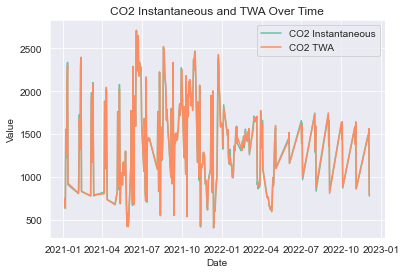

In [1]:
# Import the libraries
import pandas as pd
from datetime import datetime
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file pattern to look for
file_pattern = 'CO2'

# Define the allowed file extensions
allowed_extensions = ['.xls', '.xlsx']

# Create an empty list to store the matching file names
file_list = []

# Loop through all files in the directory
for filename in os.listdir():
    # Check if the filename contains the specified pattern
    if file_pattern in filename:
        # Check if the file has an allowed extension
        if any(ext in filename for ext in allowed_extensions):
            # Add the filename to the list
            file_list.append(filename)

# Create empty DataFrame to store merged data
merged_df = pd.DataFrame()

# Loop through each file
for i in file_list:
    # Read in file as DataFrame
    df = pd.read_excel(i)
    
    # Append DataFrame to merged_df
    merged_df = pd.concat([merged_df, df])
    
# Reset index of merged_df
merged_df.reset_index(inplace=True, drop=True)

# Change the date format from xx/xx/xx to xx-xx-xx
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
merged_df['Date'] = merged_df['Date'].dt.strftime('%m-%d-%Y %I:%M %p')
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# Define the regular expression pattern to match the second value
pattern = r'CO2 TWA: (\d+) ppm'

# Define a lambda function to extract the second value from each string
extract_value = lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else None

# Apply the lambda function to the column and create a new column with the extracted values
merged_df['Formatted Value'] = merged_df['Formatted Value'].apply(extract_value)

# Creating a new DataFrame to hold relevant data
df = merged_df[['SensorID','Date','Value','Formatted Value']]

# Renaming the columns
df = df.rename(columns={'Value': 'CO2 Instantaneous', 'Formatted Value': 'CO2 TWA'})

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert SensorID column to int
df['SensorID'] = df['SensorID'].astype(int)

# Convert CO2 Instantaneous to int
df['CO2 Instantaneous'] = df['CO2 Instantaneous'].astype(int)

# Convert CO2 TWA to int
df['CO2 TWA'] = df['CO2 TWA'].astype(int)

# Grouping by Date and getting the mean for each data point
df = df.groupby(df['Date'])[['CO2 Instantaneous', 'CO2 TWA']].mean()

# Move the 'Date' index back to a regular column
df = df.reset_index()

# Export to CSV
df.to_csv('CO2 DATA.csv',index=False)

# Set Seaborn style
sns.set_style("darkgrid")
sns.set_palette("Set2")

# create the plot
sns.lineplot(x="Date", y="CO2 Instantaneous", data=df, label="CO2 Instantaneous")
sns.lineplot(x="Date", y="CO2 TWA", data=df, label="CO2 TWA")

# set the title and axes labels
plt.title("CO2 Instantaneous and TWA Over Time")
plt.xlabel("Date")
plt.ylabel("Value")

# Save the plot to a file
plt.savefig('CO2 DATA.png')